<a href="https://colab.research.google.com/github/infrapale/3D_AI_Monitor/blob/master/Copy_of_TF_sine_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Google Colab

In [23]:
# TensorFlow is an open source machine learning library 
!pip install tensorflow==2.0 
import tensorflow as tf 
# NumPy is a math library 
import numpy as np 
# Matplotlib is a graphing library
import matplotlib.pyplot as plt 
# math is Python's math library 
import math

In [0]:
SAMPLES = 1000

In [0]:
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [0]:
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2n which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0,high=2*math.pi, size=SAMPLES)

In [0]:
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

In [0]:
# Calculate corresponding sine values
y_values = np.sin(x_values)

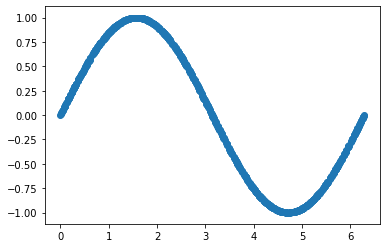

In [7]:
plt.scatter(x_values,y_values)
plt.show()

In [0]:
y_values += 0.1 * np.random.randn(*y_values.shape)

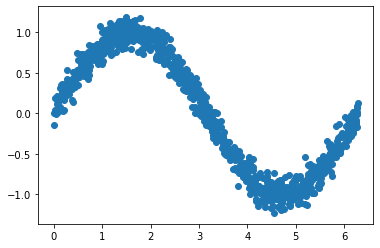

In [9]:
plt.scatter(x_values,y_values)
plt.show()

Split data into training and testing sets

In [0]:
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES + TRAIN_SPLIT)

In [0]:
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT,TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT,TEST_SPLIT])


In [21]:
# double check that the split adds up correctly
print(x_train.size, x_validate.size, x_test.size)
# assert(x_train.size, x_validate.size, x_test.size) == SAMPLES


600 200 200


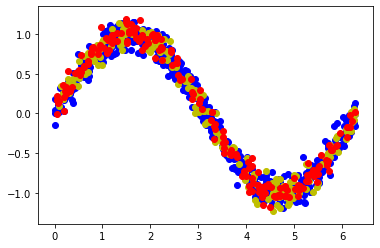

In [20]:
plt.scatter(x_train,y_train, color='b',label='Train')
plt.scatter(x_validate,y_validate, color='y',label='Validate')
plt.scatter(x_test,y_test, color='r',label='Test')
plt.show()

# Keras

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_2 = tf.keras.Sequential()


In [0]:
# First layer takes a scalar input and feeds if through 16 "neurons"
# The neurons decide whether to activate based on the rely activation function
model_1.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_2.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_2.add(layers.Dense(16,activation='relu'))

In [0]:
# Final layer is a single neuron since the output is a single value
model_1.add(layers.Dense(1))
model_2.add(layers.Dense(1))


In [0]:
# Compile using a standad optimizer and loss function for regression
model_1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_2.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


In [59]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [38]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,validation_data=(x_validate,y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 2ms/sample - loss: 0.9954 - mae: 0.8595 - val_loss: 0.6047 - val_mae: 0.7025
Epoch 2/1000
600/600 [==============================] - 0s 158us/sample - loss: 0.4951 - mae: 0.6218 - val_loss: 0.4738 - val_mae: 0.6028
Epoch 3/1000
600/600 [==============================] - 0s 158us/sample - loss: 0.4160 - mae: 0.5587 - val_loss: 0.4139 - val_mae: 0.5526
Epoch 4/1000
600/600 [==============================] - 0s 151us/sample - loss: 0.3659 - mae: 0.5252 - val_loss: 0.3624 - val_mae: 0.5162
Epoch 5/1000
600/600 [==============================] - 0s 145us/sample - loss: 0.3221 - mae: 0.4924 - val_loss: 0.3204 - val_mae: 0.4858
Epoch 6/1000
600/600 [==============================] - 0s 154us/sample - loss: 0.2875 - mae: 0.4654 - val_loss: 0.2854 - val_mae: 0.4581
Epoch 7/1000
600/600 [==============================] - 0s 152us/sample - loss: 0.2578 - mae: 0.4438 - val_loss: 0.2618 - val_ma

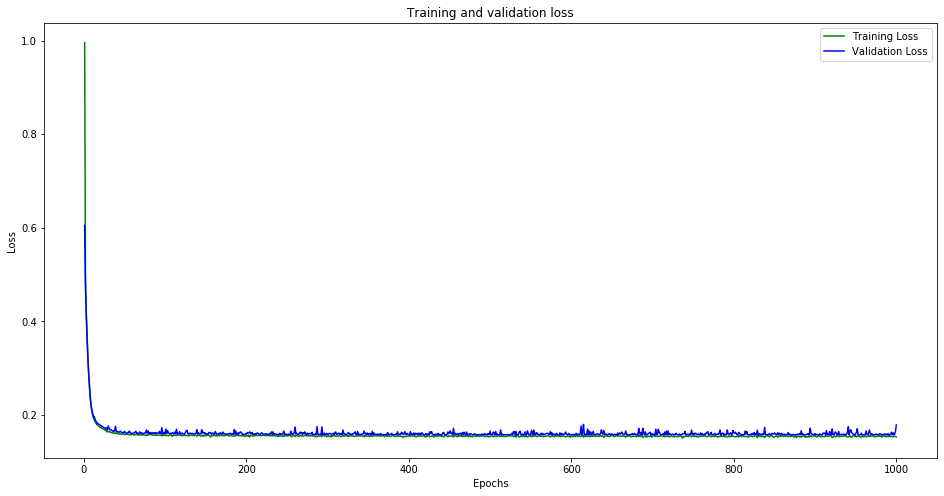

In [43]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss)+1)
fig= plt.figure(figsize=(16,8))
plt.plot(epochs,loss,'g',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

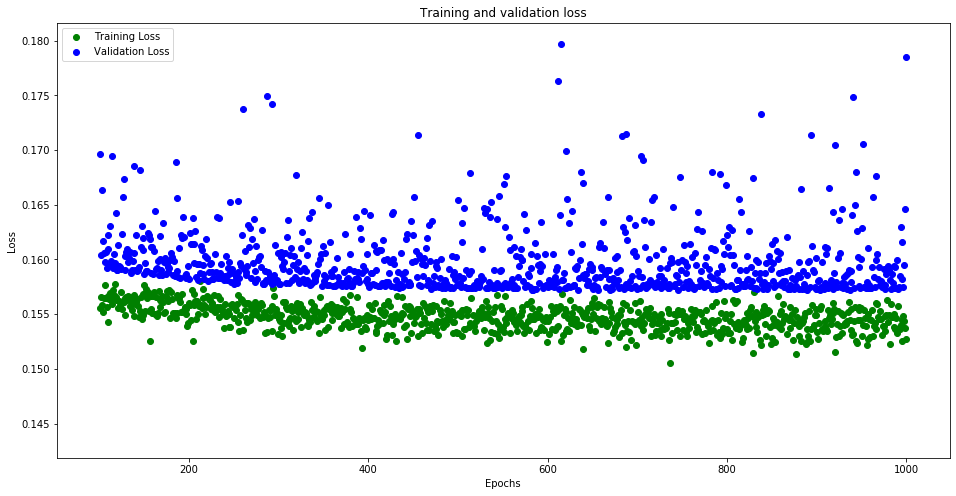

In [45]:
SKIP = 100
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss)+1)
fig= plt.figure(figsize=(16,8))
plt.scatter(epochs[SKIP:],loss[SKIP:],c='g',label='Training Loss')
plt.scatter(epochs[SKIP:],val_loss[SKIP:],c='b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
pochs = range(1, len(loss)+1)

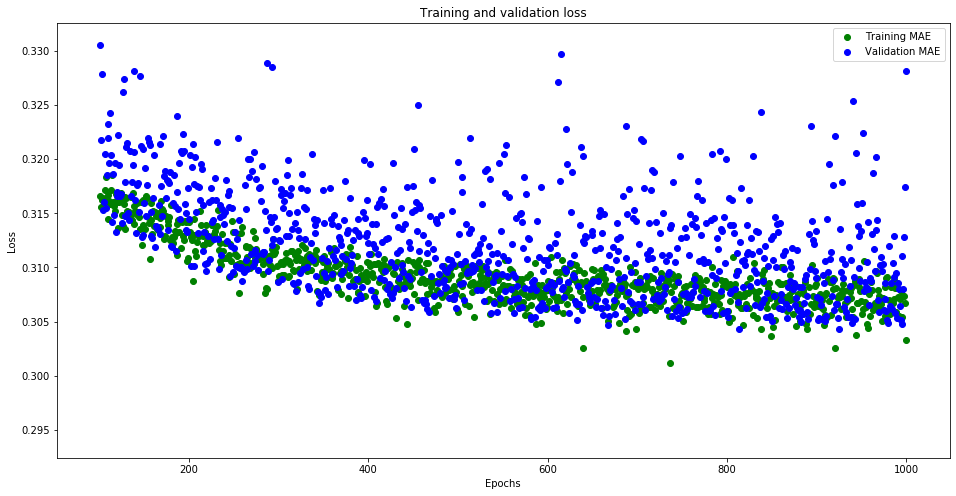

In [48]:
fig= plt.figure(figsize=(16,8))
plt.scatter(epochs[SKIP:],mae[SKIP:],c='g',label='Training MAE')
plt.scatter(epochs[SKIP:],val_mae[SKIP:],c='b',label='Validation MAE')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction

In [0]:
predictions = model_1.predict(x_train)

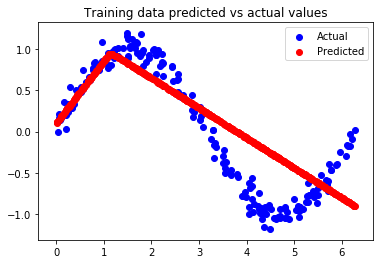

In [52]:
predictions = model_1.predict(x_train)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.scatter(x_test,y_test,c='b',label='Actual')
plt.scatter(x_train,predictions,c='r',label='Predicted')
plt.legend()
plt.show()

In [61]:
history_2 = model_2.fit(x_train, y_train, epochs=1000, batch_size=16,validation_data=(x_validate,y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 1ms/sample - loss: 0.4203 - mae: 0.5512 - val_loss: 0.4092 - val_mae: 0.5520
Epoch 2/1000
600/600 [==============================] - 0s 155us/sample - loss: 0.3697 - mae: 0.5276 - val_loss: 0.3733 - val_mae: 0.5293
Epoch 3/1000
600/600 [==============================] - 0s 161us/sample - loss: 0.3359 - mae: 0.5039 - val_loss: 0.3407 - val_mae: 0.5019
Epoch 4/1000
600/600 [==============================] - 0s 162us/sample - loss: 0.3065 - mae: 0.4834 - val_loss: 0.3087 - val_mae: 0.4795
Epoch 5/1000
600/600 [==============================] - 0s 154us/sample - loss: 0.2784 - mae: 0.4615 - val_loss: 0.2808 - val_mae: 0.4584
Epoch 6/1000
600/600 [==============================] - 0s 166us/sample - loss: 0.2539 - mae: 0.4414 - val_loss: 0.2555 - val_mae: 0.4380
Epoch 7/1000
600/600 [==============================] - 0s 155us/sample - loss: 0.2314 - mae: 0.4229 - val_loss: 0.2371 - val_ma

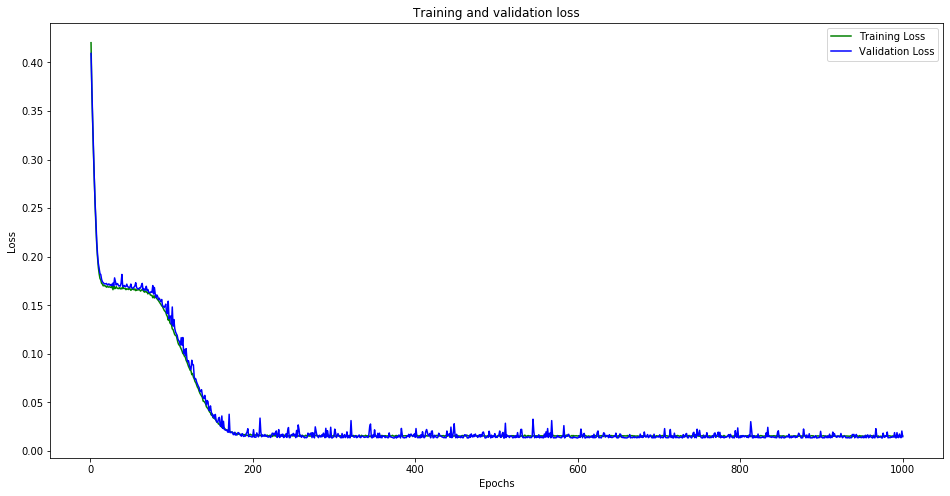

In [62]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss)+1)
fig= plt.figure(figsize=(16,8))
plt.plot(epochs,loss,'g',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

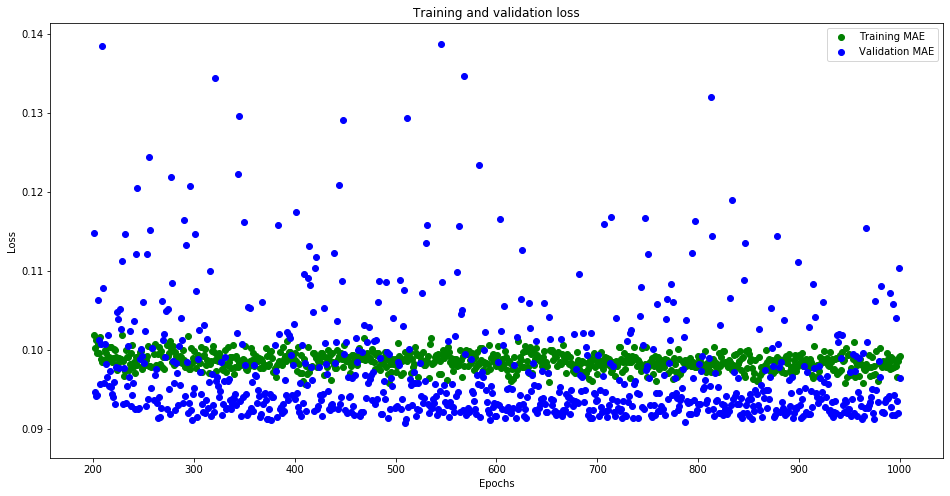

In [64]:
SKIP=200
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
epochs = range(1, len(loss)+1)
fig= plt.figure(figsize=(16,8))
plt.scatter(epochs[SKIP:],mae[SKIP:],c='g',label='Training MAE')
plt.scatter(epochs[SKIP:],val_mae[SKIP:],c='b',label='Validation MAE')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



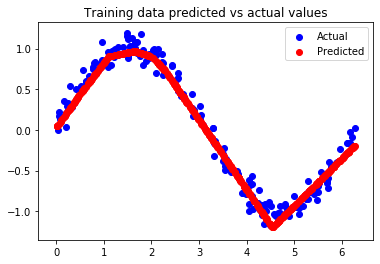

In [65]:
predictions = model_2.predict(x_train)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.scatter(x_test,y_test,c='b',label='Actual')
plt.scatter(x_train,predictions,c='r',label='Predicted')
plt.legend()
plt.show()

In [69]:
# Convert the model to the TensorFlow Lite format without quantization 
converter = tf.lite.TFLiteConverter.from_keras_model(model_2) 
tflite_model = converter.convert()

# Save the model to disk 
open("sine_model.tflite", "wb").write(tflite_model)
# Convert the model to the TensorFlow Lite format with quantization 
converter = tf.lite.TFLiteConverter.from_keras_model(model_2) 
# Indicate that we want to perform the default optimizations, 
# which include quantization 
converter.optimizations = [tf.lite.Optimize.DEFAULT] 
# Define a generator function that provides our test data's x values 
# as a representative dataset, and tell the converter to use it 

def representative_dataset_generator():  
	for value in x_test:    
	    # Each scalar value must be inside of a 2D array that is wrapped in a list    
	    yield [np.array(value, dtype=np.float32, ndmin=2)] 

converter.representative_dataset = representative_dataset_generator 
# Convert the model 
tflite_model = converter.convert()
# Save the model to disk 
open("sine_model_quantized.tflite", "wb").write(tflite_model)


2512

In [0]:
# Instantiate an interpreter for each model 
sine_model = tf.lite.Interpreter('sine_model.tflite') 
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')
# Allocate memory for each model 
sine_model.allocate_tensors() 
sine_model_quantized.allocate_tensors()
# Get indexes of the input and output tensors 
sine_model_input_index = sine_model.get_input_details()[0]["index"] 
sine_model_output_index = sine_model.get_output_details()[0]["index"] 
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0] ["index"] 
sine_model_quantized_output_index = \  sine_model_quantized.get_output_details()[0]["index"]
# Create arrays to store the results 
sine_model_predictions = [] 
sine_model_quantized_predictions = []
# Run each model's interpreter for each value and store the results in arrays 
for x_value in x_test:  
	# Create a 2D tensor wrapping the current x value  
	x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)  
	# Write the value to the input tensor  
	sine_model.set_tensor(sine_model_input_index, x_value_tensor)  
	# Run inference  
	sine_model.invoke()  
	# Read the prediction from the output tensor
	sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])  
	# Do the same for the quantized model  
	sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)  
	sine_model_quantized.invoke()  
	sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

# See how they line up with the data 
plt.clf() 
plt.title('Comparison of various models against actual values') 
plt.plot(x_test, y_test, 'bo', label='Actual') 
plt.plot(x_test, predictions, 'ro', label='Original predictions') 
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions') 
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \  label='Lite quantized predictions') 
plt.legend() 
plt.show()